In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [56]:
df = pd.read_csv('../data/clean_metrics_18_22.csv')
df.sample(random_state=538)

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year
8777,Fairmont Marion County Transit Authority,Fairmont,WV,3R05-30149,Independent Public Agency or Authority of Tran...,Rural Reporter,0.00,23.00,MB,DO,12.00,0.66,0.07,107.31,10.11,0.00,98648.00,1508329.00,149140.00,14056.00,0.00,282978.00,2020


In [57]:
conv = {
    'HR': 'Heavy Rail',
    'CB': 'Commuter Bus',
    'MB': 'Bus',
    'DR': 'Demand Response',
    'RB': 'Bus Rapid Transit',
    'LR': 'Light Rail',
    'VP': 'Vanpool',
    'YR': 'Hybrid Rail',
    'CR': 'Commuter Rail',
    'DT': 'Demand Response Taxi',
    'FB': 'Ferryboat',
    'TB': 'Trolleybus',
    'SR': 'Streetcar Rail',
    'PB': 'Publico',
    'MG': 'Monorail/Automated Guideway',
    'CC': 'Cable Car',
    'IP': 'Inclined Plane',
    'TR': 'Aerial Tramway',
    'AR': 'Alaska Railroad',
    'nan': 'nan',
    'UZA': 'Urbanized Area',
    'JT': 'Jitney',
    'Q': 'Questionable',
    'W': 'Waived'
}

df['mode_name'] = df['mode'].apply(lambda x: conv[x] if x in conv else x)

Remove NaN values.

In [58]:
def drop_cols(col, df):
    df_len = len(df)
    df = df.dropna(subset=[col])
    print(f'Dropped {df_len - len(df)} rows for having null {col}')
    return df

df = drop_cols('city', df)
df = drop_cols('passenger_miles', df)
df = drop_cols('cost_per_passenger_mile', df)

Dropped 64 rows for having null city
Dropped 0 rows for having null passenger_miles
Dropped 0 rows for having null cost_per_passenger_mile


Ridership overview.

In [59]:
df \
    .loc[:, ['city', 'year', 'mode_name', 'passenger_miles']] \
    .sort_values('passenger_miles', ascending=False).head(10)

,city,year,mode_name,passenger_miles
3638,New York,2019,Heavy Rail,10462782577.00
0,New York,2018,Heavy Rail,9989099073.00
14374,Brooklyn,2022,Heavy Rail,7055402031.00
10786,Brooklyn,2021,Heavy Rail,5668693486.00
7231,Brooklyn,2020,Heavy Rail,4676670633.00
3748,Jamaica,2019,Commuter Rail,3929859957.00
116,Jamaica,2018,Commuter Rail,3405961936.00
93,New York,2018,Commuter Rail,2154521183.00
12,Newark,2018,Commuter Rail,2148639449.00
3732,New York,2019,Commuter Rail,2034489613.00


In [60]:
df \
    .loc[:, ['city', 'year', 'mode_name', 'passenger_miles']] \
    .sort_values('passenger_miles', ascending=False).tail(10)

,city,year,mode_name,passenger_miles
7680,Nashville,2020,Demand Response,0.00
7694,Pine Bluff,2020,Demand Response,0.00
7711,Mount Pleasant,2020,Demand Response,0.00
7714,Mount Pleasant,2020,Bus,0.00
7715,Frederick,2020,Demand Response,0.00
7716,Centralia,2020,Demand Response,0.00
7718,Marshall,2020,Bus,0.00
7722,Centralia,2020,Bus,0.00
7723,Marshall,2020,Demand Response,0.00
18058,Jackson,2022,Demand Response,0.00


<Axes: xlabel='year'>

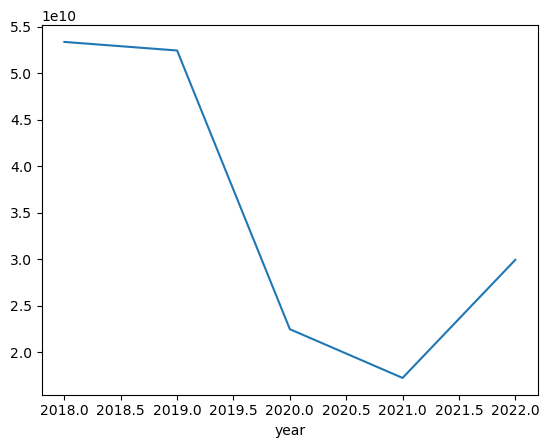

In [61]:
df.groupby('year').passenger_miles.sum().plot()

Cost outliers

In [62]:
df \
    .loc[:, ['city', 'year', 'mode_name', 'cost_per_passenger_mile']] \
    .sort_values('cost_per_passenger_mile', ascending=False)

,city,year,mode_name,cost_per_passenger_mile
14944,Modesto,2022,Commuter Bus,3056.03
7365,Woodbridge,2020,Demand Response,963.30
13834,Detroit,2021,Streetcar Rail,802.43
12059,Minneapolis,2021,Demand Response,653.42
15106,Oklahoma City,2022,Ferryboat,244.35
...,...,...,...,...
7716,Centralia,2020,Demand Response,0.00
7718,Marshall,2020,Bus,0.00
7722,Centralia,2020,Bus,0.00
7723,Marshall,2020,Demand Response,0.00


Delete extreme outliers

In [63]:
# Check Modesto Commuter bus
display(df[(df.city == 'Modesto') & (df.mode_name == 'Commuter Bus')] \
    .loc[:, ['city', 'year', 'cost_per_passenger_mile']] )

# Drop Modesto Commuter bus
df = df[(df.city != 'Modesto') | (df.mode_name != 'Commuter Bus')]

,city,year,cost_per_passenger_mile
1363,Modesto,2018,0.00
4971,Modesto,2019,0.00
8510,Modesto,2020,0.00
12049,Modesto,2021,0.00
14944,Modesto,2022,3056.03


In [64]:
len_df = len(df)
dropped_rows = df[df.cost_per_passenger_mile == 0].copy()
df = df[df.cost_per_passenger_mile > 0]
print(f'Dropped {len_df - len(df)} rows for having zero cost per passenger mile')
print(f'Breakdown of dropped rows:')
dropped_rows.groupby(['year', 'mode_name']).size()

Dropped 11882 rows for having zero cost per passenger mile
Breakdown of dropped rows:


year  mode_name                  
2018  Aerial Tramway                    1
      Bus                             771
      Bus Rapid Transit                 1
      Commuter Bus                     96
      Demand Response                1440
      Demand Response Taxi             31
      Ferryboat                        10
      Vanpool                          26
2019  Aerial Tramway                    1
      Bus                             776
      Bus Rapid Transit                 1
      Commuter Bus                     88
      Demand Response                1434
      Demand Response Taxi             32
      Ferryboat                        12
      Vanpool                          24
2020  Aerial Tramway                    1
      Bus                             779
      Bus Rapid Transit                 1
      Commuter Bus                     85
      Demand Response                1491
      Ferryboat                        11
      Streetcar Rail                    1


Cost overview.

<Axes: xlabel='year'>

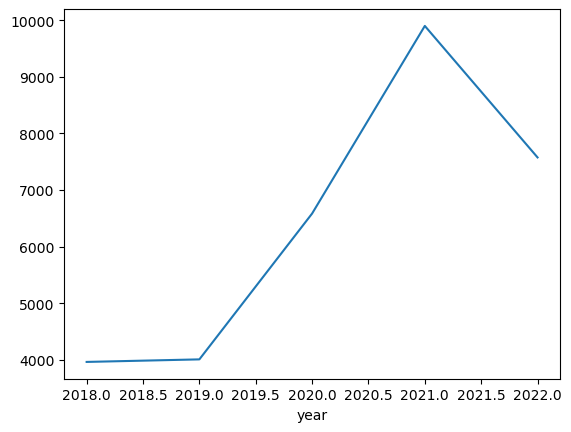

In [65]:
df.groupby('year').cost_per_passenger_mile.sum().plot()

Which modes have bounced back the most in terms of ridership?

In [66]:
(df.groupby('mode_name').passenger_miles.sum().sort_values(ascending=False) / df.passenger_miles.sum()).head(10)

mode_name
Heavy Rail          0.33
Bus                 0.32
Commuter Rail       0.20
Light Rail          0.05
Commuter Bus        0.03
Vanpool             0.03
Demand Response     0.02
Ferryboat           0.01
Bus Rapid Transit   0.00
Hybrid Rail         0.00
Name: passenger_miles, dtype: float64

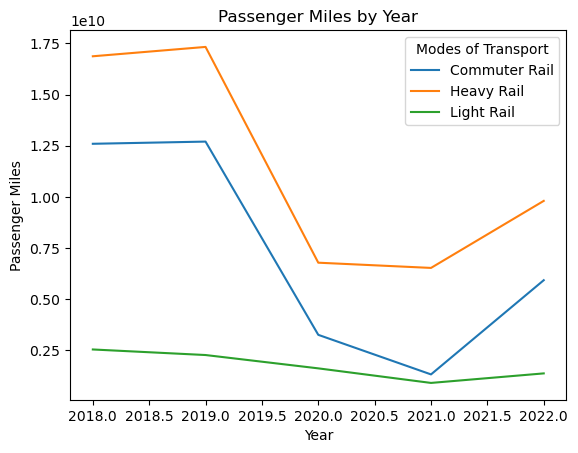

In [67]:
rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

sns.lineplot(rdf, x='year', y='passenger_miles', hue='mode_name')

plt.title('Passenger Miles by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Miles')
plt.legend(title='Modes of Transport')
plt.show()

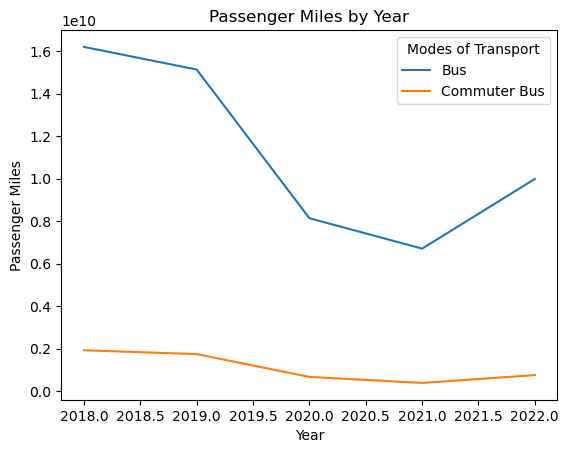

In [68]:
rdf = df[df.mode_name.isin(['Bus', 'Commuter Bus'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

sns.lineplot(rdf, x='year', y='passenger_miles', hue='mode_name')

plt.title('Passenger Miles by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Miles')
plt.legend(title='Modes of Transport')
plt.show()

Heavy rail and commuter rail together make up half of all passenger miles traveled. On the other hand, bus travel represents about a third of miles traveled.

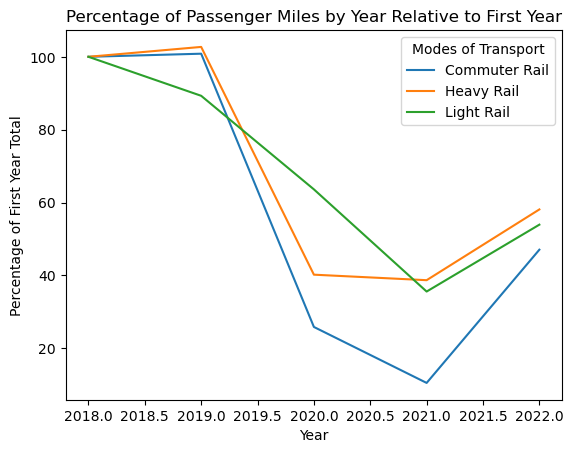

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').passenger_miles.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.passenger_miles / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.title('Percentage of Passenger Miles by Year Relative to First Year')
plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

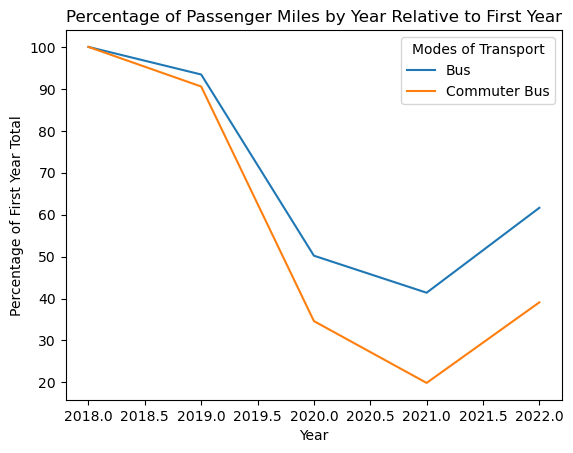

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Bus', 'Commuter Bus'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').passenger_miles.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.passenger_miles / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.title('Percentage of Passenger Miles by Year Relative to First Year')
plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

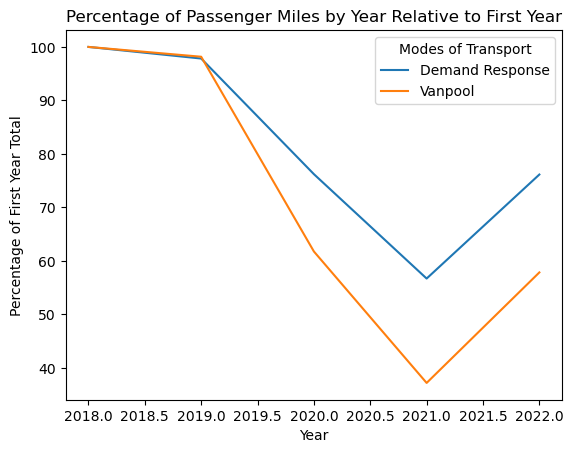

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Vanpool', 'Demand Response'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').passenger_miles.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.passenger_miles / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.title('Percentage of Passenger Miles by Year Relative to First Year')
plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

Let's also look at it in terms of cost. 

,year,mode_name,cost_per_passenger_mile
0,2018,Commuter Rail,0.70
1,2018,Heavy Rail,0.94
2,2018,Light Rail,1.22


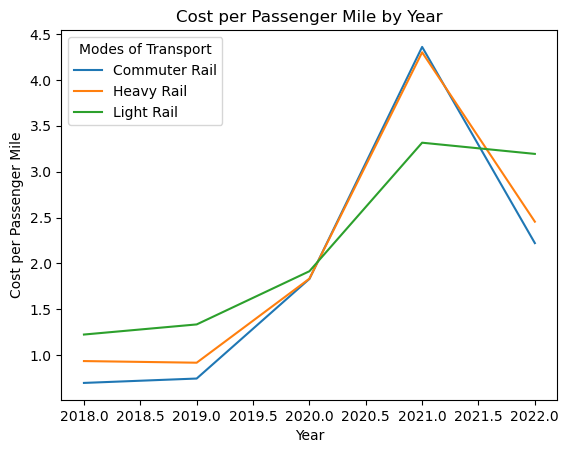

In [72]:
rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.mean().reset_index()

display(rdf.head(3))

sns.lineplot(rdf, x='year', y='cost_per_passenger_mile', hue='mode_name')

plt.title('Cost per Passenger Mile by Year')
plt.xlabel('Year')
plt.ylabel('Cost per Passenger Mile')
plt.legend(title='Modes of Transport')
plt.show()

,year,mode_name,cost_per_passenger_mile
0,2018,Bus,1.85
1,2018,Commuter Bus,0.66
2,2019,Bus,1.88
3,2019,Commuter Bus,0.69
4,2020,Bus,3.01
5,2020,Commuter Bus,1.15
6,2021,Bus,4.26
7,2021,Commuter Bus,2.63
8,2022,Bus,3.61
9,2022,Commuter Bus,2.05


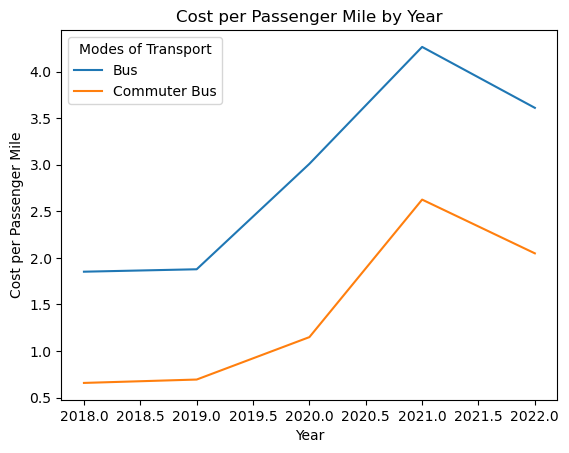

In [73]:
rdf = df[df.mode_name.isin(['Bus', 'Commuter Bus'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.mean().reset_index()

display(rdf)

sns.lineplot(rdf, x='year', y='cost_per_passenger_mile', hue='mode_name')

plt.title('Cost per Passenger Mile by Year')
plt.xlabel('Year')
plt.ylabel('Cost per Passenger Mile')
plt.legend(title='Modes of Transport')
plt.show()

Are these stats different for big cities versus rural areas, etc?

Where is the cost per passenger mile coming from? Is it declining fares, increasing operating expenses, etc?

Tree map or area plot showing the cost breakdown in different modes

Plot cities as population size bubbles. Modes are colors. Two graphs show before and after. One axis is passenger miles traveled, and the other graph is cost per passenger mile.

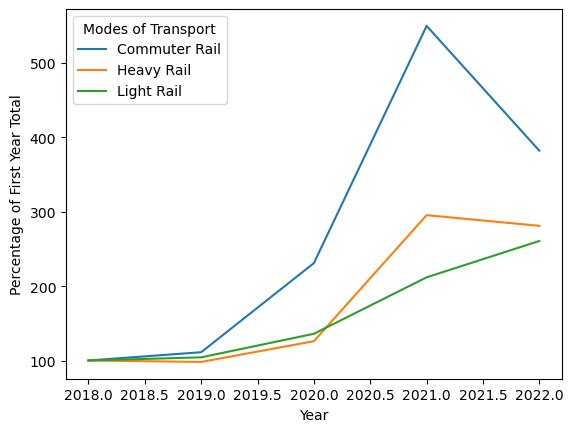

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').cost_per_passenger_mile.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.cost_per_passenger_mile / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

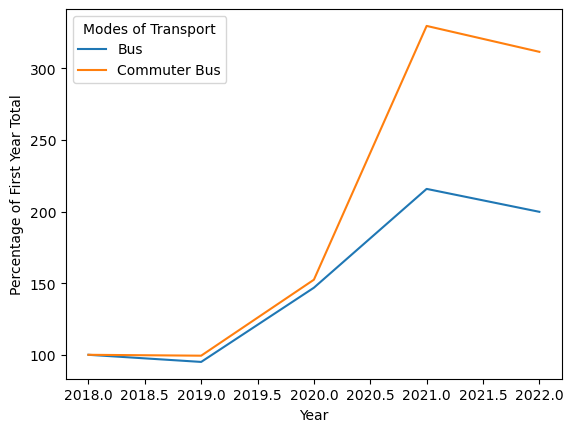

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Bus', 'Commuter Bus'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').cost_per_passenger_mile.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.cost_per_passenger_mile / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()